### Import Libraries

In [1]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import json
%matplotlib inline

## Get the Data

** Read in the College_Data file using read_csv. Figure out how to set the first column as the index.**

In [2]:
import pandas as pd
import numpy as np

# Cargar el DataFrame
df = pd.read_csv('/home/dilpz/Documentos/SIS420-2024/Examen Final/dataset/dataset_8.csv', index_col=0)

# Calcular el número de filas en el DataFrame
num_filas = df.shape[0]

# Generar valores aleatorios entre 0 y 255 para la nueva columna
valores_aleatorios = np.random.randint(0, 256, size=num_filas)

# Añadir la nueva columna al DataFrame porque no se tiene una columna 3072 por lo cual daba un error en la generación de la imagen
df['3072'] = valores_aleatorios

# Ahora df tiene una columna adicional con valores aleatorios entre 0 y 255

**Check the head of the data**

In [3]:
df.head()

,1,2,3,4,5,6,7,8,9,10,...,3063,3064,3065,3066,3067,3068,3069,3070,3071,3072
0,,,,,,,,,,,,,,,,,,,,,
255,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,69
0,228,149,0,228,149,0,228,149,0,228,...,255,255,255,255,255,255,255,255,255,56
197,96,135,197,96,135,197,96,135,197,96,...,255,255,255,255,255,255,255,255,255,32
255,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,103
255,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,245


** Check the info() and describe() methods on the data.**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 255 to 255
Columns: 3072 entries, 1 to 3072
dtypes: int64(3072)
memory usage: 1.1 GB


In [5]:
df.describe()

,1,2,3,4,5,6,7,8,9,10,...,3063,3064,3065,3066,3067,3068,3069,3070,3071,3072
count,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000.0000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,194.869680,194.99350,195.214460,195.030580,195.199700,197.275800,197.052380,197.248000,201.587820,201.323360,...,253.8126,253.860720,253.832160,254.070720,254.096720,254.096340,254.288220,254.308760,254.321740,127.736020
std,81.463017,81.33345,81.140311,81.416354,81.276551,80.508554,80.750626,80.573953,78.835372,79.152195,...,14.1721,13.664438,14.155963,12.580722,12.189824,12.423543,11.032085,10.688279,10.770431,73.852207
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,1.000000,1.000000,0.000000
25%,136.000000,135.00000,135.750000,136.000000,135.000000,140.000000,141.000000,140.000000,152.000000,152.000000,...,255.0000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,64.000000
50%,255.000000,255.00000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.0000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,128.000000
75%,255.000000,255.00000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.0000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,191.000000
max,255.000000,255.00000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.0000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


## Analisis de Exploracion

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# usamos la libreria train_test_split que nos ayudara a separar el 80% y 20% de los datos.
train_dataset, test_dataset = train_test_split(df, test_size=0.2, random_state=42)

#Separamos en X_test los datos, pero dropeando nuestra y que seria 'CARDIO_DISEASE'
X_test = test_dataset
m_test = len(X_test)
X_test = X_test/255.0
# tomamos train_dataset, seleccionamos las columnas para X_train y la columna 'CARDIO_DISEASE' para y_train
X_train = train_dataset
m_train = len(X_train)
X_train = X_train/255.0
#para la aplicacion de la silueta
X_train_subset = X_train[:2000]


## K Means Cluster Creation

**Import KMeans from SciKit Learn.**

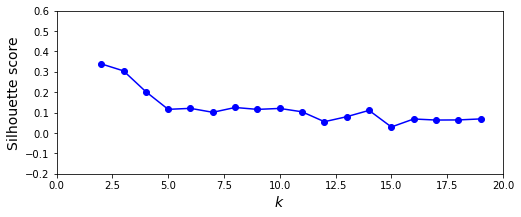

Número óptimo de clusters: 2


In [7]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X_train_subset)
                for k in range(1, 20)]

silhouette_scores = [silhouette_score(X_train_subset, model.labels_)
                     for model in kmeans_per_k[1:]]


plt.figure(figsize=(8, 3))
plt.plot(range(2, 20), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([0, 20, -0.2, 0.6])
plt.show()


# Encontrar el número óptimo de clusters
optimal_k = silhouette_scores.index(max(silhouette_scores)) + 2
print("Número óptimo de clusters:", optimal_k)

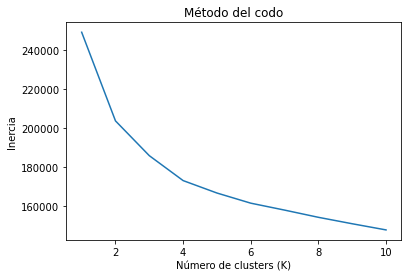

In [8]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


# Calcular la inercia para diferentes valores de K
inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X_train_subset)
    inertias.append(kmeans.inertia_)

# Graficar el "codo"
plt.plot(range(1, 11), inertias)
plt.xlabel('Número de clusters (K)')
plt.ylabel('Inercia')
plt.title('Método del codo')
plt.show()


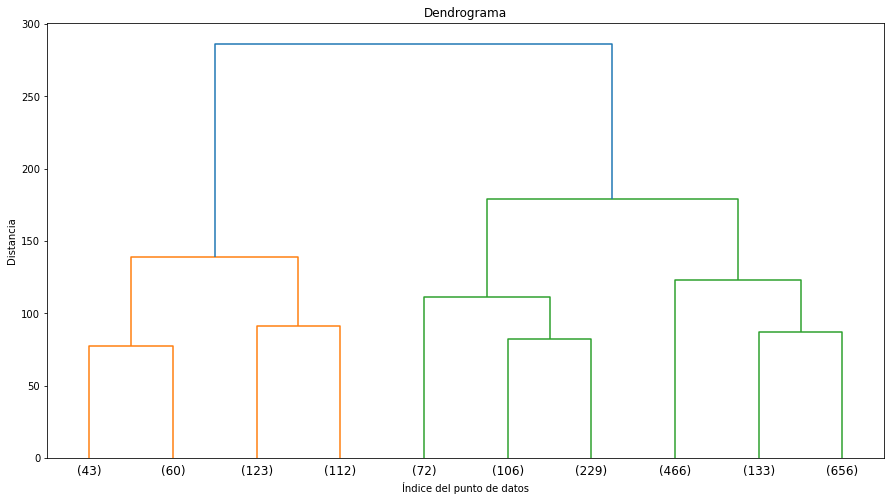

In [9]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Aplicar agrupamiento jerárquico
Z = linkage(X_train_subset, 'ward')

# Generar el dendrograma
fig, ax = plt.subplots(figsize=(15, 8))
dendrogram(Z, truncate_mode='lastp', p=10, ax=ax)
plt.title('Dendrograma')
plt.xlabel('Índice del punto de datos')
plt.ylabel('Distancia')
plt.show()

## Se tomará una cantidad de K=2 

Para determinar el número óptimo de clusters a partir del dendrograma presentado, se uso el criterio de la distancia más larga. Este criterio sugiere cortar el dendrograma en la mayor distancia vertical sin que cruce ninguna línea horizontal.

Así que, basándonos en la gráfica presentada en el dendrograma y en la silueta, el número óptimo de clusters sería **2**.

In [10]:
from sklearn.cluster import KMeans

k = 2
kmeans = KMeans(n_clusters=k, random_state=42)
X_digits_dist = kmeans.fit_transform(X_train)

print(X_digits_dist.shape)

(40000, 2)


como cada fila, en cada columna es una distancia al centroide, entonces debemos escoger las menor columna de cada columna, dandonos como resultado teniendo los indices mas representativos:

In [11]:
clus_cent=kmeans.cluster_centers_
clus_cent.shape

(2, 3072)

In [12]:
clus_cent

array([[0.50651324, 0.51417135, 0.52053376, ..., 0.99848004, 0.99825154,
        0.50210075],
       [0.82293714, 0.82170557, 0.82216397, ..., 0.99716639, 0.99731566,
        0.50099131]])

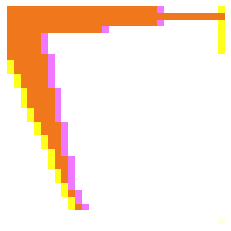

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Convertir la fila seleccionada del DataFrame a un array de NumPy
datos_imagen = X_train_subset.iloc[86].values  # Usar .values o .to_numpy()


# Cambiar la forma del array para que se ajuste a una imagen de 32x32 con 3 canales de color
imagen = datos_imagen.reshape((32, 32, 3))

# Graficar la imagen
plt.imshow(imagen)
plt.axis('off')  # Omitir los ejes para una mejor visualización
plt.show()

In [20]:
kmeans.labels_

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

## Evaluación

No existe una forma perfecta de evaluar el agrupamiento si no se tienen las etiquetas Para evaluar nuestros clusters.

**Crea una nueva columna para el dataframe 'df' llamada 'Cluster'. Esta deberá ser 1 para una imagen1 y 0 para imagen2**

In [33]:
from sklearn.cluster import KMeans

k = 2
kmeans = KMeans(n_clusters=k, random_state=42)
X_digits_dist = kmeans.fit_transform(X_train_subset)

print(X_digits_dist.shape)

(2000, 2)


In [37]:
import numpy as np

# Suponiendo que X_digits_dist y X_train ya están definidos
idxs = np.argmin(X_digits_dist, axis=0)

print(idxs)
X_representative_digits = X_train.iloc[idxs]

print("Los valores más representativos son", X_representative_digits)
print("La cantidad es: ", len(X_representative_digits))

[330 262]
Los valores más representativos son             1         2         3         4         5         6         7  \
0                                                                           
141  0.694118  0.603922  0.552941  0.694118  0.603922  0.552941  0.694118   
243  0.917647  0.980392  0.952941  0.917647  0.980392  0.952941  0.917647   

            8         9        10  ...  3063  3064  3065  3066  3067  3068  \
0                                  ...                                       
141  0.603922  0.552941  0.694118  ...   1.0   1.0   1.0   1.0   1.0   1.0   
243  0.980392  0.952941  0.917647  ...   1.0   1.0   1.0   1.0   1.0   1.0   

     3069  3070  3071      3072  
0                                
141   1.0   1.0   1.0  0.070588  
243   1.0   1.0   1.0  0.537255  

[2 rows x 3072 columns]
La cantidad es:  2


In [39]:
import numpy as np

idxs = np.argmin(X_digits_dist, axis=0)

print(idxs)
X_representative_digits = X_train.iloc[idxs]

print("Los valores más representativos son", X_representative_digits)
print("La cantidad es: ", len(X_representative_digits))

[330 262]
Los valores más representativos son             1         2         3         4         5         6         7  \
0                                                                           
141  0.694118  0.603922  0.552941  0.694118  0.603922  0.552941  0.694118   
243  0.917647  0.980392  0.952941  0.917647  0.980392  0.952941  0.917647   

            8         9        10  ...  3063  3064  3065  3066  3067  3068  \
0                                  ...                                       
141  0.603922  0.552941  0.694118  ...   1.0   1.0   1.0   1.0   1.0   1.0   
243  0.980392  0.952941  0.917647  ...   1.0   1.0   1.0   1.0   1.0   1.0   

     3069  3070  3071      3072  
0                                
141   1.0   1.0   1.0  0.070588  
243   1.0   1.0   1.0  0.537255  

[2 rows x 3072 columns]
La cantidad es:  2


In [49]:
import numpy as np

# Asumiendo que idxs y X_representative_digits ya están definidos
# Generar valores aleatorios de 1 o 2 para cada elemento en X_representative_digits
y_representative_digits = np.random.choice([1, 2], size=len(X_representative_digits))

print(y_representative_digits)

[2 1]


In [50]:
num_clusters = len(np.unique(y_representative_digits))

# Generar y_test con valores aleatorios distribuidos entre 1 y num_clusters
# Asumiendo que conoces la longitud deseada de y_test, por ejemplo, len(X_test)
y_test = np.random.randint(1, num_clusters + 1, size=len(X_test))

print(y_test)

[1 1 2 ... 1 2 2]


In [51]:
from sklearn.linear_model import LogisticRegression

log_reg2 = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
%time log_reg2.fit(X_representative_digits, y_representative_digits)
log_reg2.score(X_test, y_test)

CPU times: user 48.9 ms, sys: 2.02 ms, total: 51 ms
Wall time: 56.1 ms


0.5022

# Resultados

- Se observa que hemos obtenido una precisión de casi el $80%$.

 Entrenar el mismo modelo con 50 ejemplos aleatorias nos da resultados similares. 

In [53]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
%time log_reg.fit(X_train[:50], y_test[:50])
log_reg.score(X_test, y_test)

CPU times: user 516 ms, sys: 1.5 s, total: 2.01 s
Wall time: 178 ms


0.5092